1. K-Means
2. Hierarchical Clustering
3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
4. Mean Shift
5. Gaussian Mixture Model (GMM)
6. Spectral Clustering
7. Agglomerative Clustering
8. Affinity Propagation

# Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

In [5]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# KMeans clustering

In [6]:
from sklearn.cluster import KMeans

In [7]:
def kmeans_clustering(X, n_clusters):
  kmeans = KMeans(n_clusters=n_clusters)
  kmeans.fit(X)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  silhouette = silhouette_score(X, labels)
  return labels, centroids, silhouette

In [8]:
def generate_and_visualize_kmeans_clusters(n_centers, cluster_std, k_value):
  # Generate data
  X, y, centers = make_blobs(n_samples=500, centers=n_centers, cluster_std=cluster_std,
                             return_centers=True)

  # Perform KMeans clustering
  labels, centroids, silhouette = kmeans_clustering(X, k_value)

  print(f'Silhouette score: {silhouette:.2f}')

  # Plotting
  plt.figure(figsize=(12, 5))
  plt.suptitle(f'KMeans Clustering ({n_centers=}, {cluster_std=})')

  # Plot original data
  plt.subplot(1, 2, 1)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap='gray', edgecolor='k')
  plt.scatter(centers[:, 0], centers[:, 1], marker='X', color='red', s=200, label='True Centers')
  plt.title('Original Data')
  plt.legend()

  # Plot clustering result
  plt.subplot(1, 2, 2)
  plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', edgecolor='k')
  plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=200, label='Centroids')
  plt.title(f'Clustering Result ({k_value=})')
  plt.legend()

  plt.tight_layout()
  plt.show()

Silhouette score: 0.66


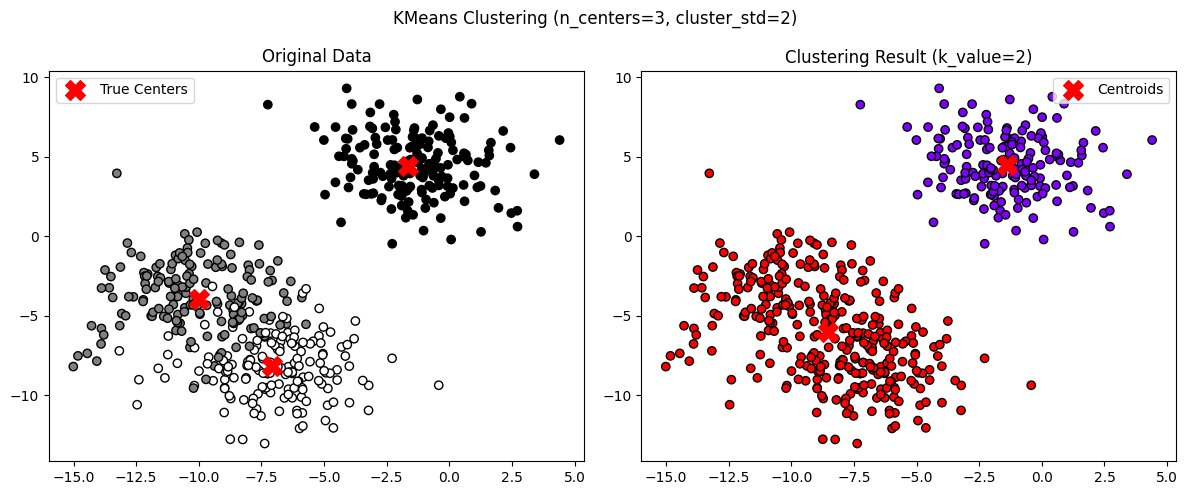

In [9]:
np.random.seed(1)
generate_and_visualize_kmeans_clusters(n_centers=3, cluster_std=2, k_value=2)

## Data with anomalies

In [10]:
def inject_anomalies(X, anomaly_probability, anomaly_scale_factor):
  X = X.copy()
  num_anomalies = int(len(X) * anomaly_probability)
  anomaly_indices = np.random.choice(len(X), num_anomalies, replace=False)
  for idx in anomaly_indices:
    scale_factor = np.random.choice([-anomaly_scale_factor, anomaly_scale_factor])
    X[idx][1] = X[idx][1] * (1 + scale_factor)
  return X

In [11]:
def generate_and_visualize_kmeans_clusters_anomaly(n_centers, cluster_std, k_value, anomaly_probability, anomaly_scale_factor):
  # Generate data without anomalies
  X_no_anomalies, y, centers = make_blobs(n_samples=500, centers=n_centers, cluster_std=cluster_std,
                                          return_centers=True)

  # Generate data with anomalies
  X_with_anomalies = inject_anomalies(X_no_anomalies, anomaly_probability, anomaly_scale_factor)

  # Perform KMeans clustering on data without anomalies
  labels_no_anomalies, centroids_no_anomalies, silhouette_no_anomalies = kmeans_clustering(X_no_anomalies, k_value)

  # Perform KMeans clustering on data with anomalies
  labels_with_anomalies, centroids_with_anomalies, silhouette_with_anomalies = kmeans_clustering(
      X_with_anomalies, k_value)

  print(f'Silhouette score without anomalies: {silhouette_no_anomalies:.2f}')
  print(f'Silhouette score with anomalies: {silhouette_with_anomalies:.2f}')

  fig, axs = plt.subplots(2, 2, figsize=(12, 10))

  # Plot data without anomalies
  axs[0, 0].scatter(X_no_anomalies[:, 0], X_no_anomalies[:, 1], c=y, cmap='gray', edgecolor='k')
  axs[0, 0].scatter(centers[:, 0], centers[:, 1], marker='X', color='red', s=200, label='True Centers')
  axs[0, 0].set_title('Original Data (No Anomalies)')
  axs[0, 0].legend()

  # Plot clustering result without anomalies
  axs[0, 1].scatter(X_no_anomalies[:, 0], X_no_anomalies[:, 1], c=labels_no_anomalies, cmap='rainbow', edgecolor='k')
  axs[0, 1].scatter(centroids_no_anomalies[:, 0], centroids_no_anomalies[:, 1],
                    marker='X', color='red', s=200, label='Centroids')
  axs[0, 1].set_title(f'Clustering Result (No Anomalies, k={k_value})')
  axs[0, 1].legend()

  # Plot data with anomalies
  axs[1, 0].scatter(X_with_anomalies[:, 0], X_with_anomalies[:, 1], c=y, cmap='gray', edgecolor='k')
  axs[1, 0].scatter(centers[:, 0], centers[:, 1], marker='X', color='red', s=200, label='True Centers')
  axs[1, 0].set_title('Original Data (With Anomalies)')
  axs[1, 0].legend()

  # Plot clustering result with anomalies
  axs[1, 1].scatter(X_with_anomalies[:, 0], X_with_anomalies[:, 1],
                    c=labels_with_anomalies, cmap='rainbow', edgecolor='k')
  axs[1, 1].scatter(centroids_with_anomalies[:, 0], centroids_with_anomalies[:, 1],
                    marker='X', color='red', s=200, label='Centroids')
  axs[1, 1].set_title(f'Clustering Result (With Anomalies, k={k_value})')
  axs[1, 1].legend()

  plt.tight_layout()
  plt.show()

Silhouette score without anomalies: 0.66
Silhouette score with anomalies: 0.80


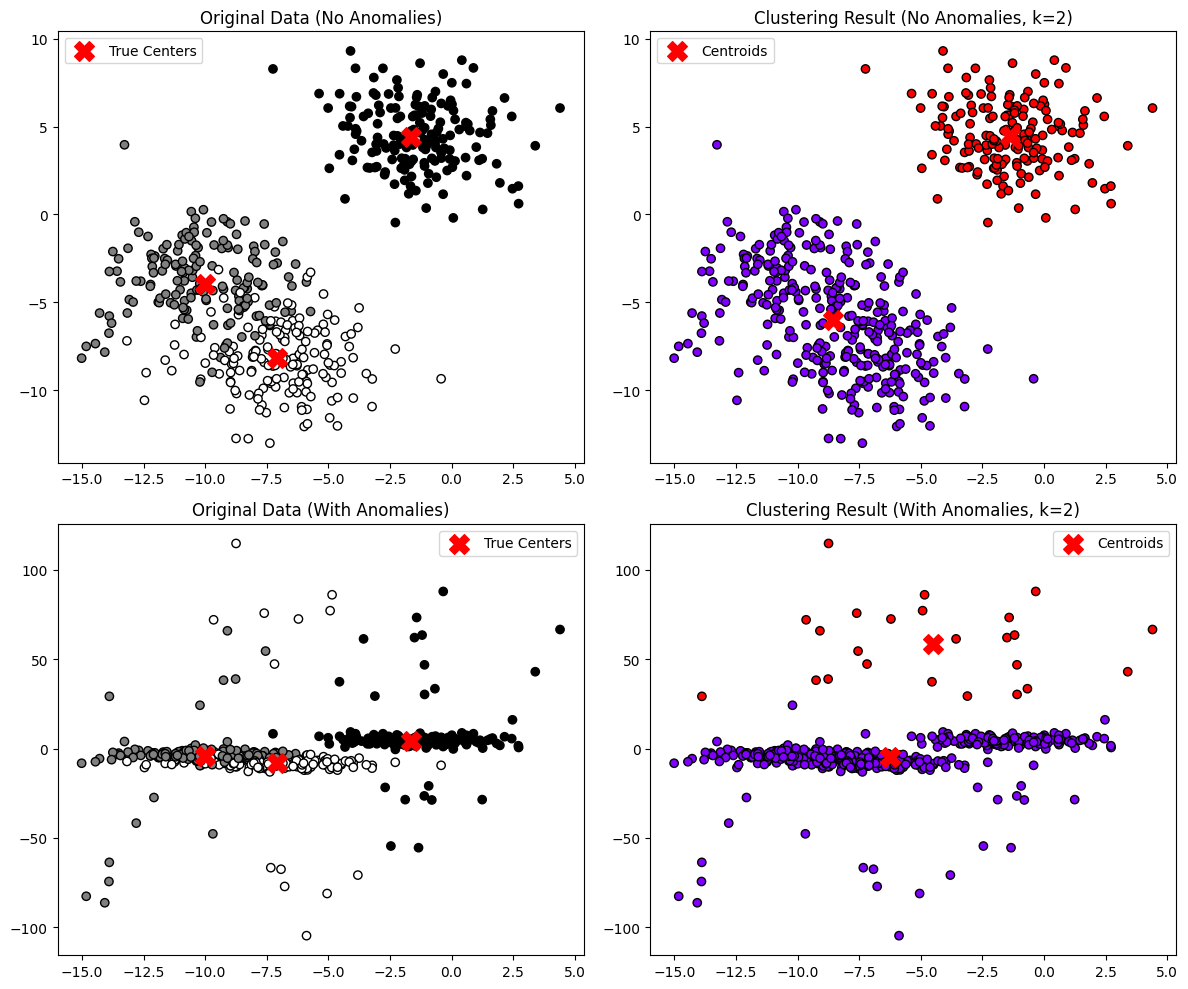

In [12]:
np.random.seed(1)
generate_and_visualize_kmeans_clusters_anomaly(
    n_centers=3, cluster_std=2, k_value=2, anomaly_probability=0.1, anomaly_scale_factor=10)

## Getting the optimal number of clusters (k_value=?)

To determine the optimal number of clusters for a dataset, two commonly used methods are:

- **Elbow Curve Method**: This method involves plotting the number of clusters (k) against the within-cluster sum of squares (distortion) and identifying the "elbow" point in the plot. The elbow point represents the point where the rate of decrease in distortion slows down significantly, indicating that adding more clusters does not significantly improve the model's performance. The number of clusters corresponding to the elbow point is often considered the optimal k value.

- **Silhouette Analysis**: Silhouette analysis measures how similar an object is to its own cluster compared to other clusters. For each data point, a silhouette score is computed, which ranges from -1 to 1. A high silhouette score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. The average silhouette score across all data points is calculated for different values of k, and the k value with the highest average silhouette score is considered the optimal number of clusters.

https://en.wikipedia.org/wiki/Cluster_analysis

https://en.wikipedia.org/wiki/Silhouette_(clustering)

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/


In [13]:
def get_optimal_k_value(n_centers, cluster_std):
  X, _ = make_blobs(n_samples=500, centers=n_centers, cluster_std=cluster_std)

  distortions = []
  silhouette_scores = []
  k_range = range(1, n_centers + 1)

  for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
    if len(np.unique(kmeans.labels_)) > 1:  # Silhouette score requires at least 2 clusters
      silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    else:
      silhouette_scores.append(0)

  # Plotting the elbow curve
  plt.figure(figsize=(10, 5))
  plt.suptitle('Getting the Optimal Value of K')

  # Plot the elbow curve
  plt.subplot(1, 2, 1)
  plt.plot(k_range, distortions, marker='o', linestyle='-', color='b')
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Distortion')
  plt.title('Elbow Curve')

  # Plot the silhouette Score
  plt.subplot(1, 2, 2)
  plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='r')
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Silhouette Score')
  plt.title('Silhouette Score')

  plt.tight_layout()
  plt.show()

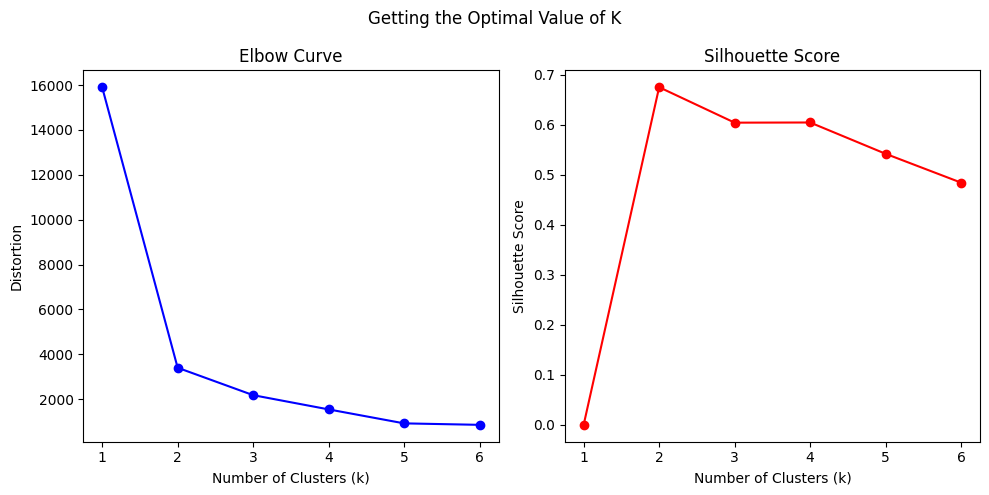

In [14]:
np.random.seed(1)
get_optimal_k_value(n_centers=6, cluster_std=1)

# Hierarchical Clustering

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
def hierarchical_clustering(X, n_clusters):
  hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
  labels = hierarchical.fit_predict(X)
  return labels

In [17]:
def calculate_cluster_centers(X, labels, n_clusters):
  cluster_centers = []
  for label in range(n_clusters):
    cluster_centers.append(X[labels == label].mean(axis=0))
  return np.array(cluster_centers)

In [26]:
def generate_and_visualize_hierarchical_clusters(n_centers, cluster_std, n_clusters):
  # Generate data
  X, y, true_centers = make_blobs(n_samples=500, centers=n_centers, cluster_std=cluster_std, return_centers=True)

  # Perform Hierarchical Clustering
  labels = hierarchical_clustering(X, n_clusters)

  # Calculate silhouette score
  silhouette = silhouette_score(X, labels)
  print(f'Silhouette score: {silhouette:.2f}')

  # Calculate cluster centers
  cluster_centers = calculate_cluster_centers(X, labels, n_clusters)

  # Plotting
  plt.figure(figsize=(12, 5))
  plt.suptitle(f'Hierarchical Clustering ({n_centers=}, {cluster_std=})')

  # Plot original data with true centers
  plt.subplot(1, 2, 1)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap='gray', edgecolor='k')
  plt.scatter(true_centers[:, 0], true_centers[:, 1], marker='X', s=200, c='red', label='True Centers')
  plt.title('Original Data')
  plt.legend()

  # Plot clustering result with cluster centers
  plt.subplot(1, 2, 2)
  plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', edgecolor='k')
  plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', s=200, c='red', label='Cluster Centers')
  plt.title(f'Clustering Result (n_clusters={n_clusters})')
  plt.legend()

  plt.tight_layout()
  plt.show()

Silhouette score: 0.46


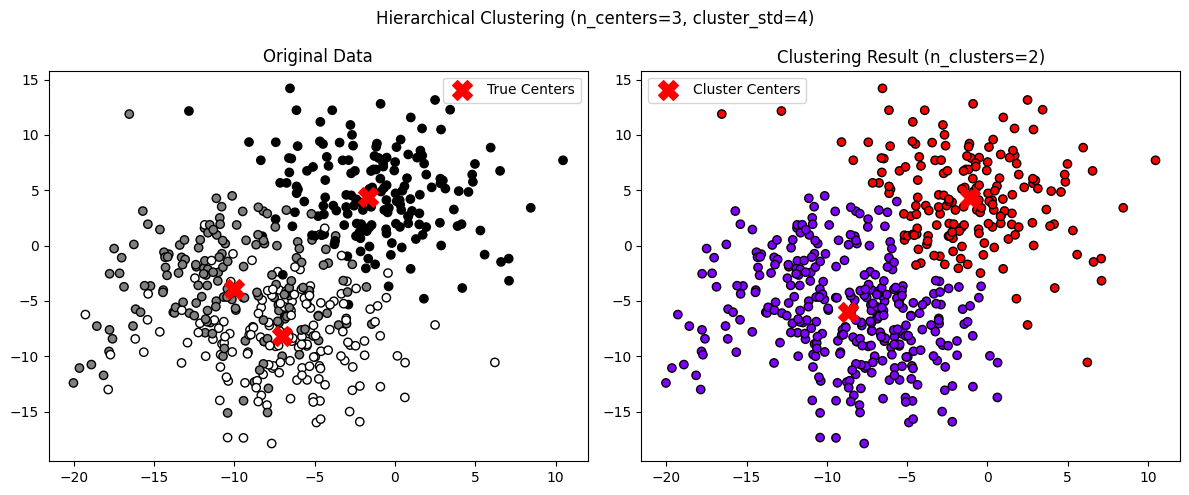

In [27]:
np.random.seed(1)
generate_and_visualize_hierarchical_clusters(n_centers=3, cluster_std=4, n_clusters=2)

## Data with anomalies

In [28]:
def generate_and_visualize_hierarchical_clusters_anomaly(n_centers, cluster_std, n_clusters, anomaly_probability, anomaly_scale_factor):
  # Generate data without anomalies
  X_no_anomalies, y, true_centers = make_blobs(
      n_samples=500, centers=n_centers, cluster_std=cluster_std, return_centers=True)

  # Generate data with anomalies
  X_with_anomalies = inject_anomalies(X_no_anomalies, anomaly_probability, anomaly_scale_factor)

  # Perform Hierarchical Clustering on data without anomalies
  labels_no_anomalies = hierarchical_clustering(X_no_anomalies, n_clusters)

  # Perform Hierarchical Clustering on data with anomalies
  labels_with_anomalies = hierarchical_clustering(X_with_anomalies, n_clusters)

  # Calculate silhouette scores
  silhouette_no_anomalies = silhouette_score(X_no_anomalies, labels_no_anomalies)
  silhouette_with_anomalies = silhouette_score(X_with_anomalies, labels_with_anomalies)
  print(f'Silhouette score without anomalies: {silhouette_no_anomalies:.2f}')
  print(f'Silhouette score with anomalies: {silhouette_with_anomalies:.2f}')

  # Calculate cluster centers
  cluster_centers_no_anomalies = calculate_cluster_centers(X_no_anomalies, labels_no_anomalies, n_clusters)
  cluster_centers_with_anomalies = calculate_cluster_centers(X_with_anomalies, labels_with_anomalies, n_clusters)

  fig, axs = plt.subplots(2, 2, figsize=(12, 10))

  # Plot data without anomalies with true centers
  axs[0, 0].scatter(X_no_anomalies[:, 0], X_no_anomalies[:, 1], c=y, cmap='gray', edgecolor='k')
  axs[0, 0].scatter(true_centers[:, 0], true_centers[:, 1], marker='X', s=200, c='red', label='True Centers')
  axs[0, 0].set_title('Original Data (No Anomalies)')
  axs[0, 0].legend()

  # Plot clustering result without anomalies with cluster centers
  axs[0, 1].scatter(X_no_anomalies[:, 0], X_no_anomalies[:, 1], c=labels_no_anomalies, cmap='rainbow', edgecolor='k')
  axs[0, 1].scatter(cluster_centers_no_anomalies[:, 0], cluster_centers_no_anomalies[:, 1],
                    marker='X', s=200, c='red', label='Cluster Centers')
  axs[0, 1].set_title(f'Clustering Result (No Anomalies, n_clusters={n_clusters})')
  axs[0, 1].legend()

  # Plot data with anomalies with true centers
  axs[1, 0].scatter(X_with_anomalies[:, 0], X_with_anomalies[:, 1], c=y, cmap='gray', edgecolor='k')
  axs[1, 0].scatter(true_centers[:, 0], true_centers[:, 1], marker='X', s=200, c='red', label='True Centers')
  axs[1, 0].set_title('Original Data (With Anomalies)')
  axs[1, 0].legend()

  # Plot clustering result with anomalies with cluster centers
  axs[1, 1].scatter(X_with_anomalies[:, 0], X_with_anomalies[:, 1],
                    c=labels_with_anomalies, cmap='rainbow', edgecolor='k')
  axs[1, 1].scatter(cluster_centers_with_anomalies[:, 0], cluster_centers_with_anomalies[:, 1],
                    marker='X', s=200, c='red', label='Cluster Centers')
  axs[1, 1].set_title(f'Clustering Result (With Anomalies, n_clusters={n_clusters})')
  axs[1, 1].legend()

  plt.tight_layout()
  plt.show()

Silhouette score without anomalies: 0.55
Silhouette score with anomalies: 0.83


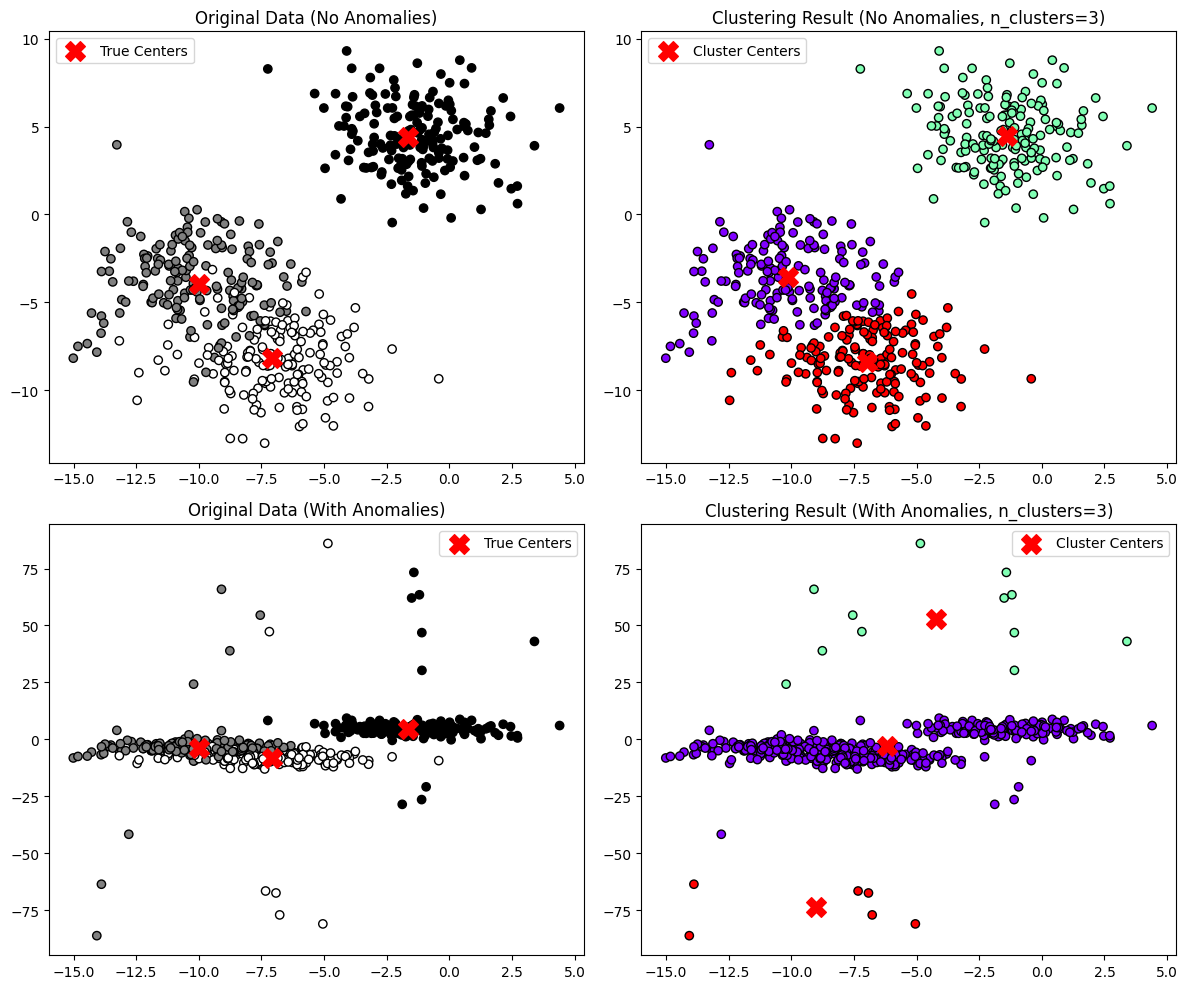

In [29]:
np.random.seed(1)
generate_and_visualize_hierarchical_clusters_anomaly(
    n_centers=3, cluster_std=2, n_clusters=3, anomaly_probability=0.05, anomaly_scale_factor=10)

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [22]:
from sklearn.cluster import DBSCAN

In [61]:
def generate_and_visualize_dbscan_clusters(n_centers, cluster_std, eps, min_samples):
  # Generate data
  X, y, true_centers = make_blobs(n_samples=500, centers=n_centers, cluster_std=cluster_std, return_centers=True)

  # Perform DBSCAN clustering
  dbscan = DBSCAN(eps=eps, min_samples=min_samples)
  labels = dbscan.fit_predict(X)

  # Count the number of clusters (excluding noise)
  n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

  # Calculate silhouette score
  if n_clusters > 1:  # Silhouette score requires at least 2 clusters
    silhouette = silhouette_score(X, labels)
  else:
    silhouette = 0

  print(f'Silhouette score: {silhouette:.2f}')

  # Calculate cluster centers
  cluster_centers = calculate_cluster_centers(X, labels, n_clusters)

  # Plotting
  plt.figure(figsize=(12, 5))
  plt.suptitle(f'DBSCAN Clustering ({n_centers=}, {cluster_std=}, {eps=}, {min_samples=})')

  # Plot original data with true centers
  plt.subplot(1, 2, 1)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap='gray', edgecolor='k')
  plt.scatter(true_centers[:, 0], true_centers[:, 1], marker='X', s=200, c='red', label='True Centers')
  plt.title('Original Data')
  plt.legend()

  # Plot clustering result
  plt.subplot(1, 2, 2)
  plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', edgecolor='k')
  plt.title(f'Clustering Result ({n_clusters=})')

  # Plot cluster centers
  plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', s=200, c='red', label='Cluster Centers')

  # Mark outliers (points labeled as -1)
  outliers = X[labels == -1]
  plt.scatter(outliers[:, 0], outliers[:, 1], marker='x', s=100, color='black', label='Outliers')
  plt.legend()

  plt.tight_layout()
  plt.show()

Silhouette score: 0.32


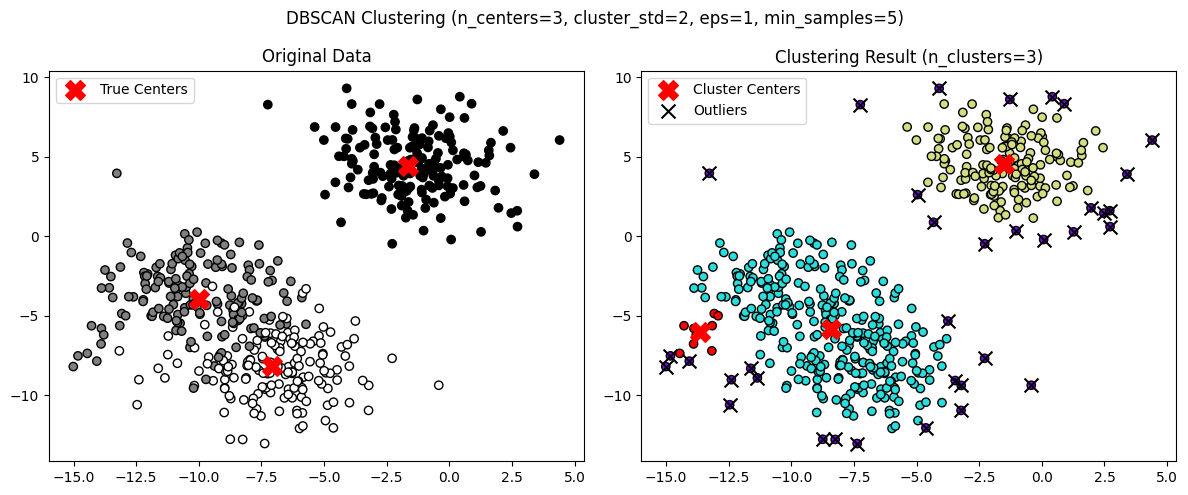

In [62]:
np.random.seed(1)
generate_and_visualize_dbscan_clusters(n_centers=3, cluster_std=2, eps=1, min_samples=5)

## Data with anomalies

In [63]:
def generate_and_visualize_dbscan_clusters_anomaly(n_centers, cluster_std, eps, min_samples, anomaly_probability, anomaly_scale_factor):
  # Generate data without anomalies
  X_no_anomalies, y, true_centers = make_blobs(
      n_samples=500, centers=n_centers, cluster_std=cluster_std, return_centers=True)

  # Generate data with anomalies
  X_with_anomalies = inject_anomalies(X_no_anomalies, anomaly_probability, anomaly_scale_factor)

  # Perform DBSCAN clustering on data without anomalies
  dbscan_no_anomalies = DBSCAN(eps=eps, min_samples=min_samples)
  labels_no_anomalies = dbscan_no_anomalies.fit_predict(X_no_anomalies)
  n_clusters_no_anomalies = len(set(labels_no_anomalies)) - (1 if -1 in labels_no_anomalies else 0)

  # Perform DBSCAN clustering on data with anomalies
  dbscan_with_anomalies = DBSCAN(eps=eps, min_samples=min_samples)
  labels_with_anomalies = dbscan_with_anomalies.fit_predict(X_with_anomalies)
  n_clusters_with_anomalies = len(set(labels_with_anomalies)) - (1 if -1 in labels_with_anomalies else 0)

  # Calculate silhouette scores
  silhouette_no_anomalies = silhouette_score(X_no_anomalies, labels_no_anomalies)
  silhouette_with_anomalies = silhouette_score(X_with_anomalies, labels_with_anomalies)
  print(f'Silhouette score without anomalies: {silhouette_no_anomalies:.2f}')
  print(f'Silhouette score with anomalies: {silhouette_with_anomalies:.2f}')

  # Calculate cluster centers and outliers for data without anomalies
  cluster_centers_no_anomalies = calculate_cluster_centers(X_no_anomalies, labels_no_anomalies, n_clusters_no_anomalies)
  outliers_no_anomalies = X_no_anomalies[labels_no_anomalies == -1]

  # Calculate cluster centers and outliers for data with anomalies
  cluster_centers_with_anomalies = calculate_cluster_centers(
      X_with_anomalies, labels_with_anomalies, n_clusters_with_anomalies)
  outliers_with_anomalies = X_with_anomalies[labels_with_anomalies == -1]

  fig, axs = plt.subplots(2, 2, figsize=(12, 10))
  plt.suptitle(f'DBSCAN Clustering ({n_centers=}, {cluster_std=}, {eps=}, {min_samples=})')

  # Plot data without anomalies with true centers
  axs[0, 0].scatter(X_no_anomalies[:, 0], X_no_anomalies[:, 1], c=y, cmap='gray', edgecolor='k')
  axs[0, 0].scatter(true_centers[:, 0], true_centers[:, 1], marker='X', s=200, c='red', label='True Centers')
  axs[0, 0].set_title('Original Data (No Anomalies)')
  axs[0, 0].legend()

  # Plot clustering result without anomalies with cluster centers and outliers
  axs[0, 1].scatter(X_no_anomalies[:, 0], X_no_anomalies[:, 1], c=labels_no_anomalies, cmap='rainbow', edgecolor='k')
  axs[0, 1].scatter(cluster_centers_no_anomalies[:, 0], cluster_centers_no_anomalies[:, 1],
                    marker='X', s=200, c='red', label='Cluster Centers')
  axs[0, 1].scatter(outliers_no_anomalies[:, 0], outliers_no_anomalies[:, 1],
                    marker='x', s=100, color='black', label='Outliers')
  axs[0, 1].set_title(f'Clustering Result (No Anomalies, n_clusters={n_clusters_no_anomalies})')
  axs[0, 1].legend()

  # Plot data with anomalies with true centers
  axs[1, 0].scatter(X_with_anomalies[:, 0], X_with_anomalies[:, 1], c=y, cmap='gray', edgecolor='k')
  axs[1, 0].scatter(true_centers[:, 0], true_centers[:, 1], marker='X', s=200, c='red', label='True Centers')
  axs[1, 0].set_title('Original Data (With Anomalies)')
  axs[1, 0].legend()

  # Plot clustering result with anomalies with cluster centers and outliers
  axs[1, 1].scatter(X_with_anomalies[:, 0], X_with_anomalies[:, 1],
                    c=labels_with_anomalies, cmap='rainbow', edgecolor='k')
  axs[1, 1].scatter(cluster_centers_with_anomalies[:, 0], cluster_centers_with_anomalies[:, 1],
                    marker='X', s=200, c='red', label='Cluster Centers')
  axs[1, 1].scatter(outliers_with_anomalies[:, 0], outliers_with_anomalies[:, 1],
                    marker='x', s=100, color='black', label='Outliers')
  axs[1, 1].set_title(f'Clustering Result (With Anomalies, n_clusters={n_clusters_with_anomalies})')
  axs[1, 1].legend()

  plt.tight_layout()
  plt.show()

Silhouette score without anomalies: 0.63
Silhouette score with anomalies: 0.65


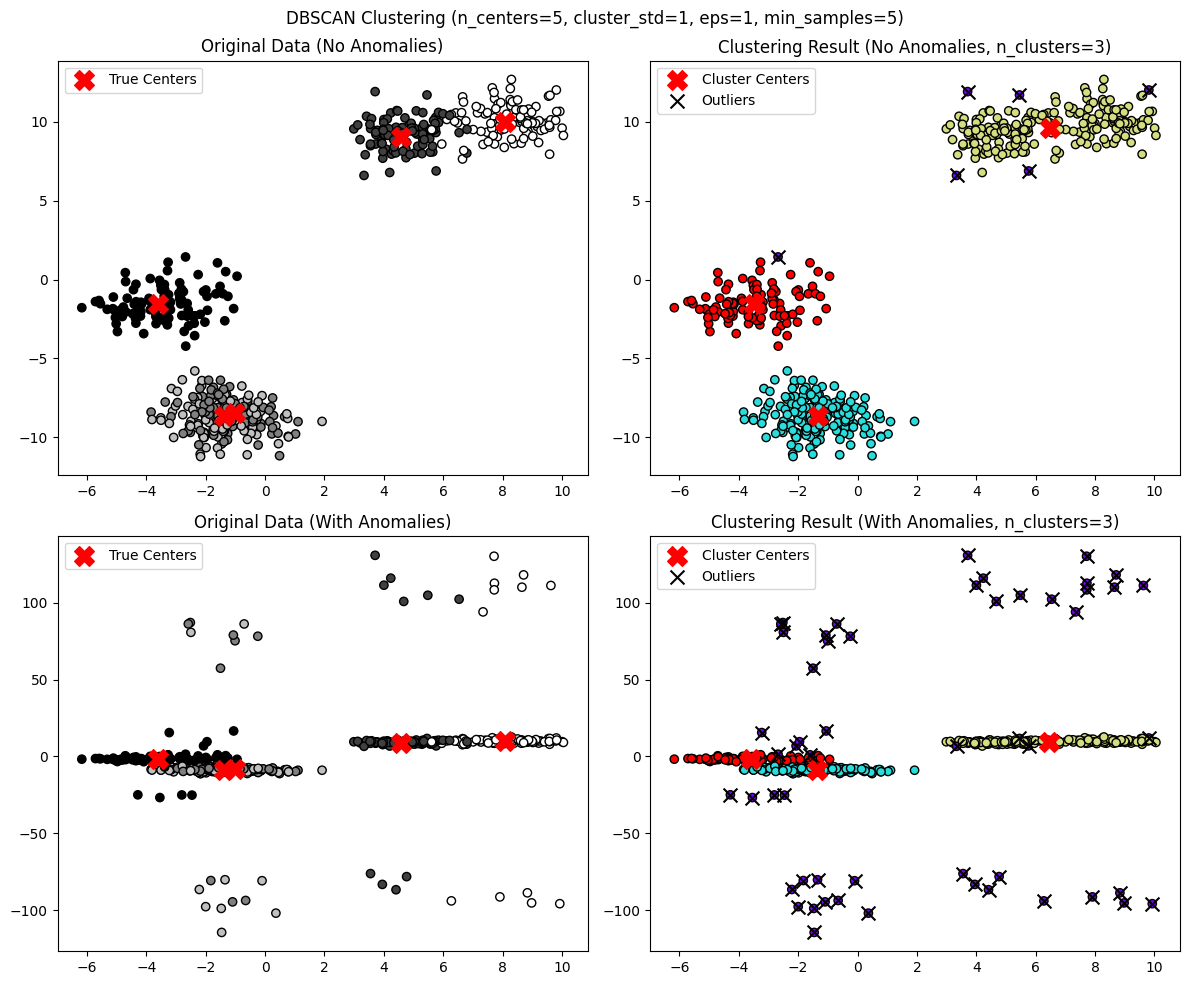

In [71]:
generate_and_visualize_dbscan_clusters_anomaly(
    n_centers=5, cluster_std=1, eps=1, min_samples=5, anomaly_probability=0.1, anomaly_scale_factor=10)